# Analyses of multiple large populations using SAMPLED DATA

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pickle
import gzip
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy import stats

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [2]:
%ls Figures/

MultiSim-Large-1000_sim/         MultiSim-Ref-10k_sim/
MultiSim-Large-100_sim/          SAMPLED-MultiSim-Large-1000_sim/


## Load data

In [3]:
%ls ../saved_simulations/

SAMPLED-Results-Large-Neutral_vs_Selection-HIGH_MUTRATE/
large-selection_0p1-1000_MultiSim/
large-selection_0p15-1000_MultiSim/


In [4]:
%%time

# SELECTION = 0.15 POPULATIONS
prefix = '../saved_simulations/large-selection_0p15-1000_MultiSim/'
selection_0p15 = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p15.append(data)
print(len(selection_0p15))
print(type(selection_0p15[0]))

100%|██████████| 1000/1000 [02:41<00:00,  6.18it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 48s, sys: 46.8 s, total: 2min 35s
Wall time: 2min 41s


In [5]:
selection_0p15[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,34052125,116402657,1.000000,0,61165,1.000000,"(0, 0, 0)"
A.0,13,0.001,172935,174906,0.001503,1,313,1.085458,"(119, 54, 120)"
A.1,14,0.001,0,0,0.000000,1,0,1.080562,"(208, 20, 126)"
A.2,14,0.001,17260,17363,0.000149,1,28,0.890690,"(161, 245, 194)"
A.3,14,0.001,2666658,2727898,0.023435,1,3874,1.467907,"(13, 5, 78)"


## Sample data

In [6]:
sample_size=10**6
detection_limit=100

In [7]:
%%time
for i in tqdm(range(len(selection_0p15))):
    selection_0p15[i] = sample(selection_0p15[i], sample_size, detection_limit)
print(len(selection_0p15))

100%|██████████| 1000/1000 [43:49<00:00,  2.63s/it]

1000
CPU times: user 42min 38s, sys: 45.6 s, total: 43min 23s
Wall time: 43min 49s


In [8]:
selection_0p15[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,34052125,116402657,1.000000,0,61165,1.000000,"(0, 0, 0)",293179,1000000,1.000000
A.0,13,0.001,172935,174906,0.001503,1,313,1.085458,"(119, 54, 120)",1463,1471,0.001471
A.2,14,0.001,17260,17363,0.000149,1,28,0.890690,"(161, 245, 194)",149,149,0.000149
A.3,14,0.001,2666658,2727898,0.023435,1,3874,1.467907,"(13, 5, 78)",22788,23186,0.023186
A.5,15,0.001,28536,28639,0.000246,1,34,1.225334,"(15, 62, 208)",220,220,0.000220


## Maximum allele frequencies

In [9]:
%%time
selection_0p15_MaxAFs = get_max_AFs(selection_0p15, sampled=True)

CPU times: user 5.17 s, sys: 3.32 s, total: 8.48 s
Wall time: 8.88 s


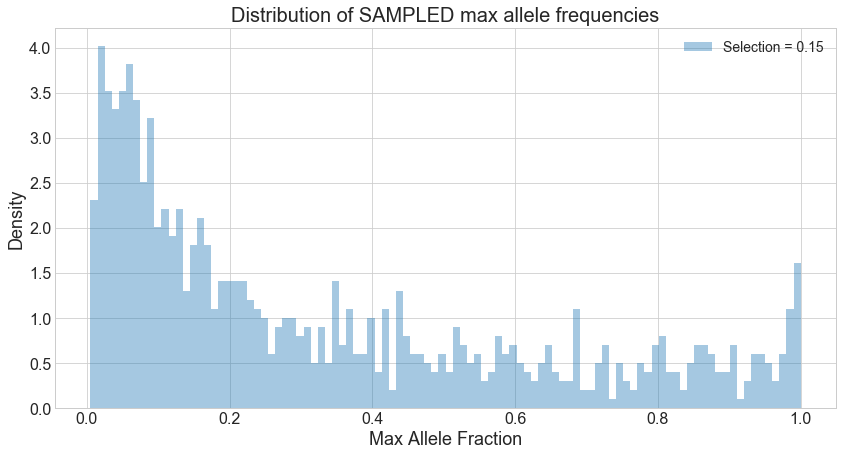

In [10]:
sns.distplot(selection_0p15_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.15");
plt.title('Distribution of SAMPLED max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p15-MaxAFs.png')
plt.show()

## Heterogeneity

In [11]:
%%time
selection_0p15_H = get_heterogeneity(selection_0p15, sampled=True)

CPU times: user 1.19 s, sys: 10 ms, total: 1.2 s
Wall time: 1.21 s


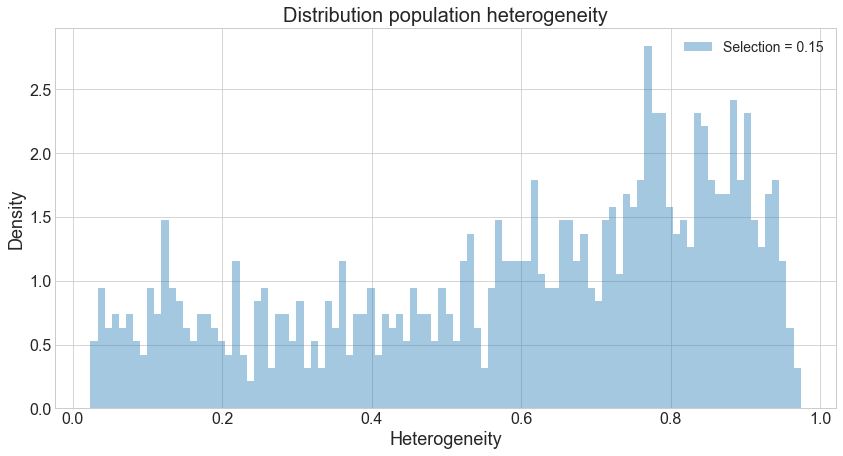

In [12]:
sns.distplot(selection_0p15_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.15");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p15-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [13]:
%%time
selection_0p15_mut_distr = get_mutation_distributions(selection_0p15, sampled=True)

CPU times: user 58.9 s, sys: 362 ms, total: 59.3 s
Wall time: 59.6 s


In [14]:
selection_0p15_mut_distr.to_csv('../simulation_data/SAMPLED-Large-1000_sim-selection_0p15_mut_distr.csv')

In [15]:
selection_0p15_avg_nmd = selection_0p15_mut_distr.mean()
selection_0p15_std_nmd = selection_0p15_mut_distr.std()

In [16]:
%%time
selection_0p15_avg_num_mut = avg_num_mutations(selection_0p15_avg_nmd)

CPU times: user 835 µs, sys: 73 µs, total: 908 µs
Wall time: 875 µs


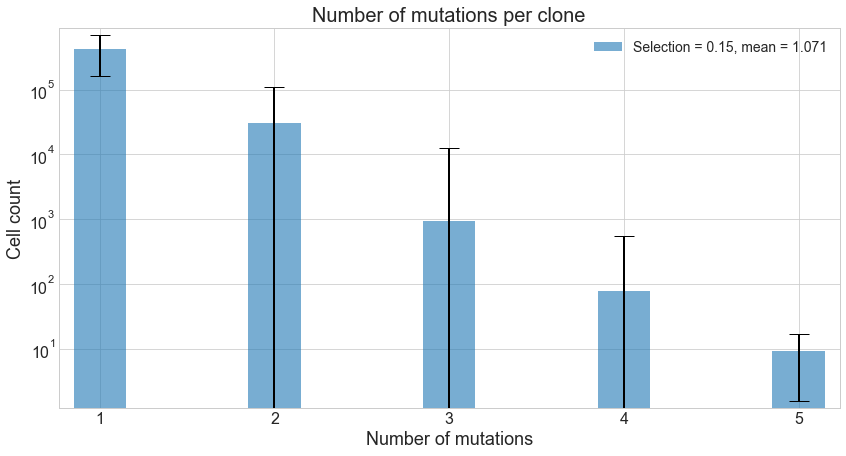

In [17]:
selection_0p15_errors = selection_0p15_std_nmd.values

plt.bar(left=selection_0p15_avg_nmd.index, height=selection_0p15_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=selection_0p15_errors, capsize=10, 
        label="Selection = 0.15, mean = %s" %(round(selection_0p15_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p15_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p15-Num_mutations.png')
plt.show()

## Total number of mutations

In [18]:
%%time
selection_0p15_total_m = get_total_mutations(selection_0p15, det_lim=1)

CPU times: user 726 ms, sys: 4.97 ms, total: 731 ms
Wall time: 732 ms


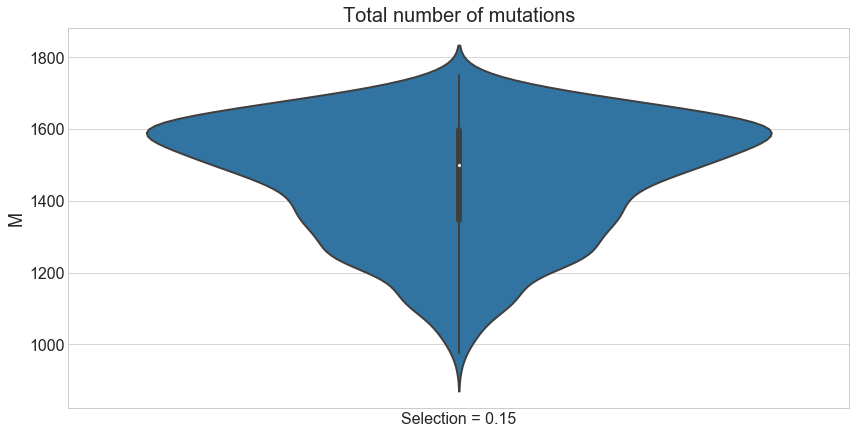

In [19]:
sns.violinplot(data=[selection_0p15_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.15"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p15-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [20]:
alpha = 0.3

In [21]:
%%time
selection_0p15_rec_errors = get_reconstruction_errors(selection_0p15, alpha, sampled=True)

CPU times: user 2min, sys: 76.6 ms, total: 2min
Wall time: 2min


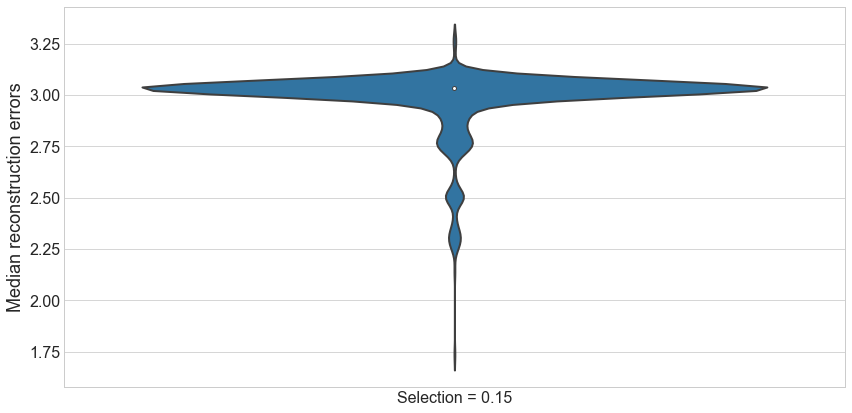

In [22]:
sns.violinplot(data=[selection_0p15_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.15"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p15-Rec_errors.png')
plt.show()

## Export data

In [23]:
d = pd.DataFrame()
d["selection_0p15_MaxAFs"] = selection_0p15_MaxAFs
d["selection_0p15_H"] = selection_0p15_H
d["selection_0p15_total_m"] = selection_0p15_total_m
d["selection_0p15_rec_errors"] = selection_0p15_rec_errors

d.to_csv('../simulation_data/SAMPLED-Large-selection_0p15-1000_sim-Analyzed_data.csv')